<a href="https://colab.research.google.com/github/snehagandla30/Oasis-Infobyte/blob/main/Predicting_House_Prices_with_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


Dataset loaded succesfully!
Shape:545rows x 13columns


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad     

/tmp/ipython-input-658429226.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-658429226.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


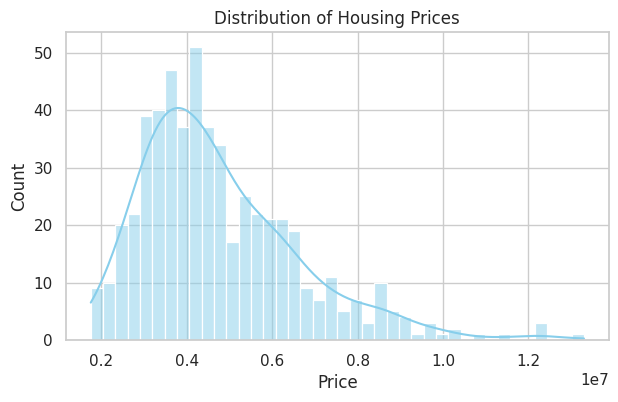

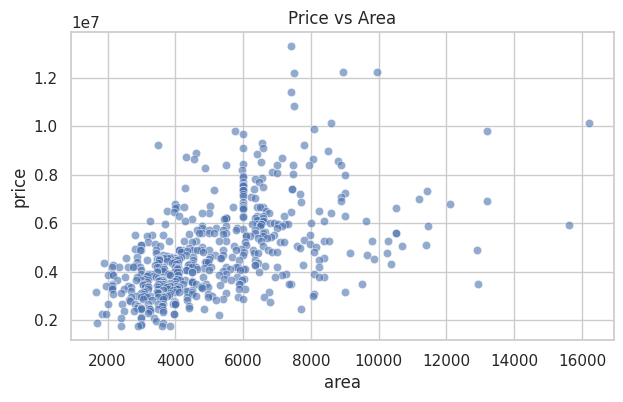


 Feature Preparation
Target variable: price

🏠 Training Linear Regression Model...
Linear Regression RMSE: 1331071.417
Linear Regression R²: 0.649


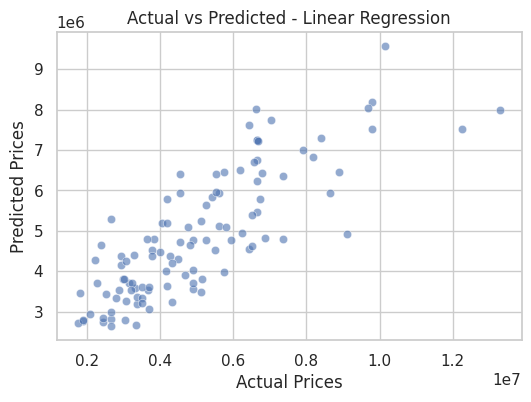


Training Random Forest Regressor for comparison...
Random Forest RMSE: 1395378.571
Random Forest R²: 0.615


/tmp/ipython-input-658429226.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values[:10], y=feat_importance.index[:10], palette='viridis') # Corrected barpplot to barplot and plt.title to plt.title()


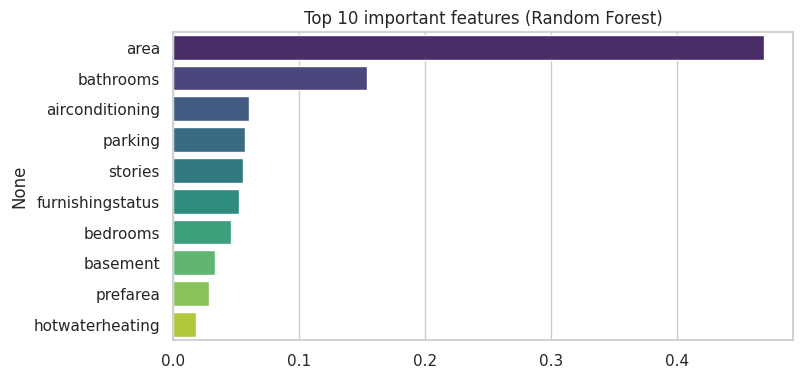


Insights & Recommendations
Linear regression gives baseline performance for housing price prediction.
Random Forest improves accuracy by caturing non-linear patterns
Feature importance shows which attributes influence price most.
Use standardized scaling and remove outliers for better stability.
Datset is ready for further tuning(GridSearchCV or XGBoost).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # Corrected import
from sklearn.metrics import mean_squared_error, r2_score # Corrected import
sns.set(style="whitegrid")

# Step 1: Load Dataset
file_name = "Housing.csv"
df = pd.read_csv(file_name)

print("Dataset loaded succesfully!")
print(f"Shape:{df.shape[0]}rows x {df.shape[1]}columns")
display(df.head())

# Step 2: Data overview & cleaning
print("\n Basic Info:")
df.info()

print("\nMissing Values:")
print(df.isna().sum())

# Corrected for loop syntax
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

before = df.shape[0]
df.drop_duplicates(inplace=True) # Corrected inplace=true to inplace=True
print(f"\nRemoved {before - df.shape[0]} duplicate rows.")

# Step 3: EDA

display(df.describe()) # Corrected described() to describe()

if 'price' in df.columns:
  plt.figure(figsize=(7,4))
  sns.histplot(df['price'], bins=40, kde=True, color='skyblue')
  plt.title("Distribution of Housing Prices")
  plt.xlabel("Price")
  plt.show()

  num_df = df.select_dtypes(include=[np.number])
  if num_df.shape[1] > 1:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x='area', y='price', data=df, alpha=0.6)
    plt.title("Price vs Area")
    plt.show()

# Step 4: Feature encoding & preparation
print("\n Feature Preparation")

for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

target_candidates = [c for c in df.columns if 'price' in c.lower()]
target = target_candidates[0] if target_candidates else df.columns[-1]
print(f"Target variable: {target}")

X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 5: Train Linear Regression Model

print("\n🏠 Training Linear Regression Model...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


y_pred_lr = lr.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.3f}")
print(f"Linear Regression R²: {r2_lr:.3f}")

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()


# Step 6: Random Forest Regressor

print("\nTraining Random Forest Regressor for comparison...")
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R²: {r2_rf:.3f}")

feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=feat_importance.values[:10], y=feat_importance.index[:10], palette='viridis') # Corrected barpplot to barplot and plt.title to plt.title()
plt.title("Top 10 important features (Random Forest)")
plt.show()

# Step 7: Insights & recommendations

print("\nInsights & Recommendations")
print("Linear regression gives baseline performance for housing price prediction.")
print("Random Forest improves accuracy by caturing non-linear patterns")
print("Feature importance shows which attributes influence price most.")
print("Use standardized scaling and remove outliers for better stability.")
print("Datset is ready for further tuning(GridSearchCV or XGBoost).")